# An example of using EASYMORE with source netCDF files in regular Latitude and Longitude
## Remapping of ERA5 to subbasins of South Saskatchewan River at Medicine Hat, Alberta, Canada.

In [129]:
# loading EASYMORE
from easymore.easymore import easymore

# initializing EASYMORE object
esmr = easymore()

# specifying EASYMORE objects
# name of the case; the temporary, remapping and remapped file names include case name
esmr.case_name                = 'ERA5_Medicine_Hat'              
# temporary path that the EASYMORE generated GIS files and remapped file will be saved
esmr.temp_dir                 = '../temporary/'
# name of target shapefile that the source netcdf files should be remapped to
esmr.target_shp               = '../data/target_shapefiles/South_Saskatchewan_MedicineHat.shp'
# name of netCDF file(s); multiple files can be specified with *
esmr.source_nc                = '../data/Source_nc_ERA5/ERA5_NA_*.nc'
# name of variables from source netCDF file(s) to be remapped
esmr.var_names                = ['airtemp','pptrate']
# rename the variables from source netCDF file(s) in the remapped files;
# it will be the same as source if not provided
esmr.var_names_remapped       = ['temperature','precipitation']
# name of variable longitude in source netCDF files
esmr.var_lon                  = 'longitude'
# name of variable latitude in source netCDF files
esmr.var_lat                  = 'latitude'
# name of variable time in source netCDF file; should be always time
esmr.var_time                 = 'time'
# location where the remapped netCDF file will be saved
esmr.output_dir               = '../output/'
# format of the variables to be saved in remapped files,
# if one format provided it will be expanded to other variables
esmr.format_list              = ['f4']
# fill values of the variables to be saved in remapped files,
# if one value provided it will be expanded to other variables
esmr.fill_value_list          = ['-9999.00']
# if required that the remapped values to be saved as csv as well
esmr.save_csv                 = True
esmr.complevel                 =  9
# if uncommented EASYMORE will use this and skip GIS tasks
#esmr.remap_csv                = '../temporary/ERA5_Medicine_Hat_remapping.csv'

# execute EASYMORE
esmr.nc_remapper()


EASYMORE version 0.0.3 is initiated.
no author name is provide and the author name is changed to (author name)!
EASYMORE is given multiple varibales to be remapped but only on format and fill valueEASYMORE repeat the format and fill value for all the variables in output files
EASYMORE will remap variable  airtemp  from source file to variable  temperature  in remapped NeCDF file
EASYMORE will remap variable  pptrate  from source file to variable  precipitation  in remapped NeCDF file
EASYMORE detects that target shapefile is in WGS84 (epsg:4326)
EASYMORE detects that no field for ID is provided in sink/target shapefile
arbitarary values of ID are added in the field ID_t
EASYMORE detects that either of the fields for latitude or longitude is not provided in sink/target shapefile
calculating centroid of shapes in WGS84 projection;
for better appximation use the easymore equal area centroid function to preprocess target shapefile
EASYMORE detects that no field for latitude is provided in 

/Users/shg096/opt/anaconda3/envs/myenv38/lib/python3.8/site-packages/geopandas/_vectorized.py:150: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  out[:] = [_pygeos_to_shapely(geom) for geom in data]
/Users/shg096/opt/anaconda3/envs/myenv38/lib/python3.8/site-packages/geopandas/_vectorized.py:150: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'MultiPolygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  out[:] = [_pygeos_to_shapely(geom) for geom in data]


it seems everything is OK with the sink/target shapefile; added to EASYMORE object target_shp_gpd
EASYMORE will save standard shapefile for EASYMORE claculation as:
../temporary/ERA5_Medicine_Hat_target_shapefile.shp
EASYMORE detects that the varibales from the netCDF files are identicalin dimensions of the varibales and latitude and longitude
EASYMORE detects that all the varibales have dimensions of:
['time', 'latitude', 'longitude']
EASYMORE detects that the longitude varibales has dimensions of:
['longitude']
EASYMORE detects that the latitude varibales has dimensions of:
['latitude']
EASYMORE detects case 1 - regular lat/lon
max difference of lat values in source nc files are :  0.0
max difference of lon values in source nc files are :  0.0
EASYMORE is creating the shapefile from the netCDF file and saving it here:
../temporary/ERA5_Medicine_Hat_source_shapefile.shp
EASYMORE detects that shapefile longitude is between -180 and 180, no correction is performed
inside shp_lon_correct

/Users/shg096/opt/anaconda3/envs/myenv38/lib/python3.8/site-packages/geopandas/_vectorized.py:150: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  out[:] = [_pygeos_to_shapely(geom) for geom in data]
/Users/shg096/opt/anaconda3/envs/myenv38/lib/python3.8/site-packages/geopandas/_vectorized.py:150: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'MultiPolygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  out[:] = [_pygeos_to_shapely(geom) for geom in data]
/Users/shg096/opt/anaconda3/envs/myenv38/lib/python3.8/site

------REMAPPING------
netcdf output file will be compressed at level 9
Removing existing remapped .nc file.
Remapping ../data/Source_nc_ERA5/ERA5_NA_19790101.nc to ../output/ERA5_Medicine_Hat_remapped_1979-01-01-00-00-00.nc
Started at date and time 2022-03-10 12:20:59.813258
Ended   at date and time 2022-03-10 12:21:00.161784
------
Converting variable temperature from remapped file of ../output/ERA5_Medicine_Hat_remapped_1979-01-01-00-00-00.nc to ../output/ERA5_Medicine_Hat_remapped_temperature_K_1979-01-01-00-00-00.csv
Saving the ID, lat, lon map at ../output/ERA5_Medicine_Hat_remapped_temperature_K_1979-01-01-00-00-00.csv
Converting variable precipitation from remapped file of ../output/ERA5_Medicine_Hat_remapped_1979-01-01-00-00-00.nc to ../output/ERA5_Medicine_Hat_remapped_precipitation_kg m**-2 s**-1_1979-01-01-00-00-00.csv
Saving the ID, lat, lon map at ../output/ERA5_Medicine_Hat_remapped_precipitation_kg m**-2 s**-1_1979-01-01-00-00-00.csv
------
Removing existing remapped .nc

--------------

# Visualization of the source and the results

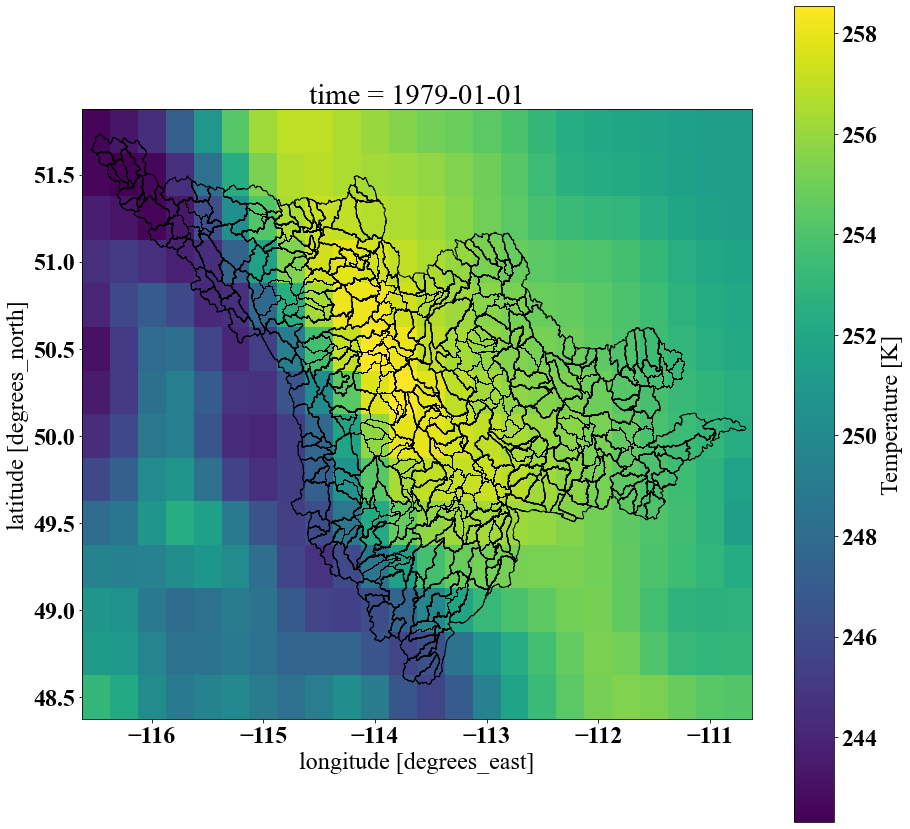

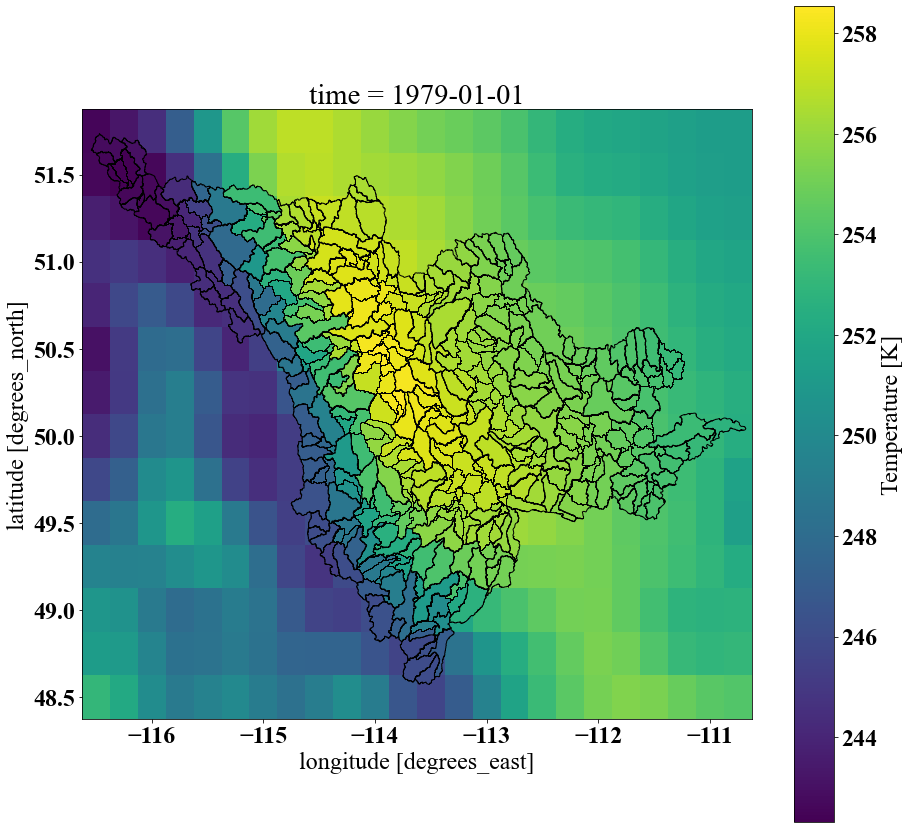

In [51]:
# visualize the result
import geopandas as gpd
import xarray as xr
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'Times New Roman',
         'weight' : 'bold',
         'size'   : 24}
matplotlib.rc('font', **font)

# visualize the original netCDF for the first file, first time step
shp_target = gpd.read_file(esmr.target_shp) # load the target shapefile
# load the first source netcdf file
nc_name = sorted(glob.glob(esmr.source_nc))
ds_source = xr.open_dataset(nc_name[0])
# subset the region of interest:
lat_lim = np.array([ 48.2 , 51.7 ]) # limit for lat
lon_lim = np.array([ -116.5 , -110.5 ]) # limit for lon
lats = np.array(ds_source.variables[esmr.var_lat][:] )
lons = np.array(ds_source.variables[esmr.var_lon][:])
lat_low = np.argmin( np.abs( lats - lat_lim[0] ) )
lat_up = np.argmin( np.abs( lats - lat_lim[1] ) )
lon_low = np.argmin( np.abs( lons - lon_lim[0] ) )
lon_up = np.argmin( np.abs( lons - lon_lim[1] ) )
if lat_up < lat_low:
    temp = lat_low
    lat_low = lat_up
    lat_up = temp
if lon_up < lon_low:
    temp = lon_low
    lon_low = lon_up
    lon_up = temp
ds_source = ds_source.isel(latitude=np.arange(lat_low,lat_up))
ds_source = ds_source.isel(longitude=np.arange(lon_low,lon_up))
# plotting
f, axes = plt.subplots(1,1,figsize=(15,15))
ds_source.airtemp[0,:,:].plot( ax = axes)
shp_target.geometry.boundary.plot(color=None,edgecolor='k',linewidth = 1, ax = axes)
plt.savefig('../fig/Example1_A.png')

# visualize the remapped netCDF for the first file, first time step
# target nc file
nc_names = sorted(glob.glob (esmr.output_dir + esmr.case_name + '*.nc'))
ds       = xr.open_dataset(nc_names[0]) # the first netcdf file
values   = ds.temperature [0,:] # the first time frame of the first 
IDs      = ds.ID [:] # get the ID
# create a data frame for the model simulation
df = pd.DataFrame()
df ['value'] = values
df ['ID_t']    = IDs  # .astype(int)
df = df.sort_values (by = 'ID_t')
# load the shape file target that is generated by EASYMORE (with consistent IDs)
shp_target = gpd.read_file(esmr.temp_dir+ esmr.case_name + '_target_shapefile.shp') # load the target shapefile
shp_target ['ID_t'] = shp_target ['ID_t'].astype(float)
shp_target = shp_target.sort_values(by='ID_t')# sort on values
shp_target = pd.merge_asof(shp_target, df, on='ID_t', direction='nearest')
shp_target = shp_target.set_geometry('geometry') #bring back the geometry filed; pd to gpd
# plotting
f, axes = plt.subplots(1,1,figsize=(15,15))
ds_source.airtemp[0,:,:].plot( ax = axes)
ds_source.airtemp[0,:,:].plot( ax = axes, alpha = 1, add_colorbar=False)
shp_target.plot(column= 'value', edgecolor='k',linewidth = 1, ax = axes )#, legend=True)
plt.savefig('../fig/Example1_B.png')


# test of the visualziation function

In [133]:
# 
import geopandas as gpd
import xarray as xr
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import glob
import datetime
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from datetime import datetime
from   easymore.easymore import easymore
font = {'family' : 'Times New Roman',
         'weight' : 'bold',
         'size'   : 24}
matplotlib.rc('font', **font)



##
target_date_time = '1979-01-03 01:00:00'
variable = 'airtemp'
nc_name = find_nc_for_tartget_datetime (esmr.source_nc, target_date_time)
print(nc_name)

# open the dataset
ds = xr.open_dataset(nc_name)
ds_slice = ds.sel(time=target_date_time, method='nearest')
print(ds_slice)

# plotting

# if case is 1...
if esmr.case == 1: # regular lat/lon
    # plotting
    f, axes = plt.subplots(1,1,figsize=(15,15))
    ds_slice[variable].plot( ax = axes, cmap='jet', vmin=250, vmax=290)
    

if esmr.case == 2: # rotate lat/lon
    # plotting
    f, axes = plt.subplots(1,1,figsize=(15,15))
    
    value    = np.array(ds_slice[variable]).flatten() # the first time frame of the first 
    lat      = np.array(ds_slice[XLAT]).flatten()  # the first time frame of the first 
    lon      = np.array(ds_slice[XLONG]).flatten()  # the first time frame of the first 
    
    # 
    lat_shp = shp_source ['lat_s']
    lon_shp = shp_source ['lon_s']
    idx = np.zeros(len(lat_shp))
    value = np.zeros(len(lat_shp))

    for i in np.arange(len(lat_shp)):
        # find the row of the shapefile that is closes to the point
        diff = abs(lat-lat_shp[i])+ abs(lon-lon_shp[i])
        temp = np.where(diff == np.min(diff))
        idx[i] = temp[0].astype(int)
        a = idx[i]
        value[i] = T2 [a.astype(int)]


    shp_source ['value'] = value
    
    
    # # create the colorbar
    norm = colors.Normalize(vmin=shp_source.value.min(), vmax=shp_source.value.max())
    cbar = plt.cm.ScalarMappable(norm=norm, cmap='YlGnBu_r')

    # plot
    fig, axes = plt.subplots(1,1,figsize=(13,13))

    # with no normalization
    shp_source.plot(column='value', cmap='YlGnBu_r', legend=False, ax=axes)
    
    
ll
    
    



# def visualziation (nc_names,
#                    variable,
#                    target_date_time,
#                    name_of_shp,
#                    case = 1,
#                    name_lon_var = 
#                    name_lat_var = 
#                    shp_ID_field = None,
#                    nc_ID_variable = None,
#                    cmap = 'viridis',
#                    fig_size = (15,15),
#                    x_lim_value = None,
#                    y_lim_value = None,
#                    v_min_max = None):
    
    
#     # find the nc name that the model simulation
#     nc_name = find_nc_for_tartget_datetime (nc_names, target_date_time)
#     print(nc_name)
    
#     # open the dataset
#     ds = xr.open_dataset(nc_name)
#     ds_slice = ds.sel(time=target_date_time, method='nearest')
#     print(ds_slice)
    
#     # read the shapefile that is generated by the easymore in nc_remapper
#     shp = gdp.read_file(name_of_shp)
    
#     # set v_min and v_max from the files
#     if not v_min_max:
#         v_min_max = [0,0]
#         v_min_max[0] = np.array(ds_slice[variable].min())
#         v_min_max[1] = np.array(ds_slice[variable].max())
        
#     #
#     if case ==1: # regular lat/lon
#         # plotting
#         f, axes = plt.subplots(1,1,figsize=fig_size)
#         ds_slice[variable].plot( ax = axes, cmap=cmap, vmin=v_min_max[0], vmax=v_min_max[1])
        
#     # 
#     if case ==2: # rotated lat/lon
#         # merging with the dataset
    
#     if x_lim_value:
#         axes.set_xlim(x_lim_value[0],x_lim_value[1])
    
#     if y_lim_value:
#         axes.set_ylim(y_lim_value[0],y_lim_value[1])
    
#     #
#     shp = gdp.read_file(esmr.temp_dir+esmr.case_name+'_viz_shapefile.shp')
    
#     print(shp)
    
#     ll
    
#     print(np.array(ds_slice[variable].min()))
    
    
    
#     # visualize the original netCDF for the first file, first time step
#     if name_of_shp:
        
#         # read the variables and put into a dataframe
#         variable = np.array(ds_slice[variable])
#         variable = variable.flatten()
        
#         # read the ID and put them into a dataframe
#         ID = np.array(ds_slice[nc_ID_variable]) # reading the ID
#         ID = ID.flatten()

#         # creating a data frame
#         df = np.vstack((ID,variable)) # creating the np with the ID and variables from the netcdf file
#         df = df.transpose() # transposing the nparray
#         df = pd.DataFrame(df) # changing the nparray to dataframe
#         df = df.rename(columns={0: 'ID', 1: 'values'}) # renaming the ID and values

#         # read the shapefile;
#         shp = gpd.read_file(name_of_shp)
#         shp ['ID'] = shp[shp_ID_field]

#         # merging the values of dataframe, df, to the shapefile
#         shp_value = pd.merge(df, shp, on=['ID']) # merging the shapefile and the
#         shp_value = gpd.GeoDataFrame(shp_value) # creating the geopandas frame; needed to make it gpd frame again
        
        
#         # plot
#         f, axes = plt.subplots(1,1,figsize=fig_size)
#         shp_value.plot(column='values', cmap=cmap, ax=axes, vmin=v_min_max[0], vmax=v_min_max[1], legend=True )
    
#     else:
        
#         print('EASYMORE detect that only netcdf file is provided for visualziation assume that is gridded')

#         # plotting
#         f, axes = plt.subplots(1,1,figsize=fig_size)
#         ds_slice[variable].plot( ax = axes, cmap=cmap, vmin=v_min_max[0], vmax=v_min_max[1])
        
    
#     if x_lim_value:
#         axes.set_xlim(x_lim_value[0],x_lim_value[1])
    
#     if y_lim_value:
#         axes.set_ylim(y_lim_value[0],y_lim_value[1])
    
    
def find_nc_for_tartget_datetime (nc_names,
                                  target_date_time):
    """
    @ author:                  Shervan Gharari
    @ Github:                  ./shervangharari/repository
    @ author's email id:       sh.gharari@gmail.com
    @ license:                 Apache2
    This function get the name of files (with *) and find the associated
    nc files based on target_date_time
    Parameters
    ----------
    self
    nc_name: string
    target_date_time: target date and time
    Returns
    -------
    nc_name: string The output nc name
    """
    # If there is * in the nc_name means that there is more
    nc_names = sorted(glob.glob(nc_names))
    target_date_time = datetime.datetime.strptime(target_date_time, '%Y-%m-%d %H:%M:%S')
    large = 10**50 # set very large value

    for nc_name in nc_names:

        ds_temp = xr.open_dataset(nc_name) # open the data sets
        datetimeindex = ds_temp.indexes['time']#.to_datetimeindex() #convert to datetime

        delta_start = target_date_time - datetimeindex[0]
        delta_start = delta_start.days + (delta_start.seconds)/84600 # convert to float
        delta_end   = target_date_time - datetimeindex[-1]
        delta_end   = delta_end.days   + (delta_end.seconds)/84600 # convert to float

        if (delta_start>=0) & (delta_end<=0): # the target time is between min and max
            nc_name_target = nc_name

        if (delta_start>0) & (delta_end>0): # the target is later than the nc file
            if (delta_start<large) or (delta_end<large):
                nc_name_target = nc_name
                large = min (delta_end, delta_start)

        if (delta_start<0) & (delta_start<0): # the target is earlier than the nc file
            if (abs(delta_start)<large) or (abs(delta_end)<large):
                nc_name_target = nc_name
                large = min (abs(delta_end), abs(delta_start))

    nc_name = nc_name_target
    return nc_name



AttributeError: type object 'datetime.datetime' has no attribute 'datetime'

In [126]:
visualziation (esmr.source_nc,
               'airtemp',
               '1979-01-03 01:00:00',
               esmr,
               name_of_shp = None,
               cmap = 'jet',
               x_lim_value = (-117,-110),
               y_lim_value = (48.5,52.0), #) # 'viridis' ,
               v_min_max= (240,265) )



../data/Source_nc_ERA5/ERA5_NA_19790103.nc
<xarray.Dataset>
Dimensions:    (longitude: 481, latitude: 281)
Coordinates:
  * longitude  (longitude) float32 -170.0 -169.8 -169.5 ... -50.5 -50.25 -50.0
  * latitude   (latitude) float32 75.0 74.75 74.5 74.25 ... 5.75 5.5 5.25 5.0
    time       datetime64[ns] 1979-01-03T01:00:00
Data variables:
    pptrate    (latitude, longitude) float32 ...
    airtemp    (latitude, longitude) float32 ...
Attributes:
    Author:                                   Created by W. Knoben from ERA5 ...
    History:                                  Created Thu Mar 26 18:19:23 2020
    Source:                                   Written using Python (github.co...
    Reason:                                   (1) ERA5 surface and pressure f...
    Conventions (pressure level (10m) data):  CF-1.6
    history (pressure level (10m) data):      2020-01-29 19:02:52 GMT by grib...
    Conventions (surface level data):         CF-1.6
    history (surface level data):     

IndexError: list index out of range

../output/ERA5_Medicine_Hat_remapped_1979-01-03-00-00-00.nc
<xarray.Dataset>
Dimensions:        (ID: 417)
Coordinates:
    time           datetime64[ns] 1979-01-03T01:00:00
  * ID             (ID) float64 1.0 2.0 3.0 4.0 5.0 ... 414.0 415.0 416.0 417.0
Data variables:
    latitude       (ID) float64 ...
    longitude      (ID) float64 ...
    temperature    (ID) float32 ...
    precipitation  (ID) float32 ...
Attributes:
    Conventions:  CF-1.6
    Author:       The data were written by author name
    License:      
    History:      Created Wed Mar  9 14:24:10 2022
    Source:       Case: ERA5_Medicine_Hat; remapped by script from library of...
246.58722


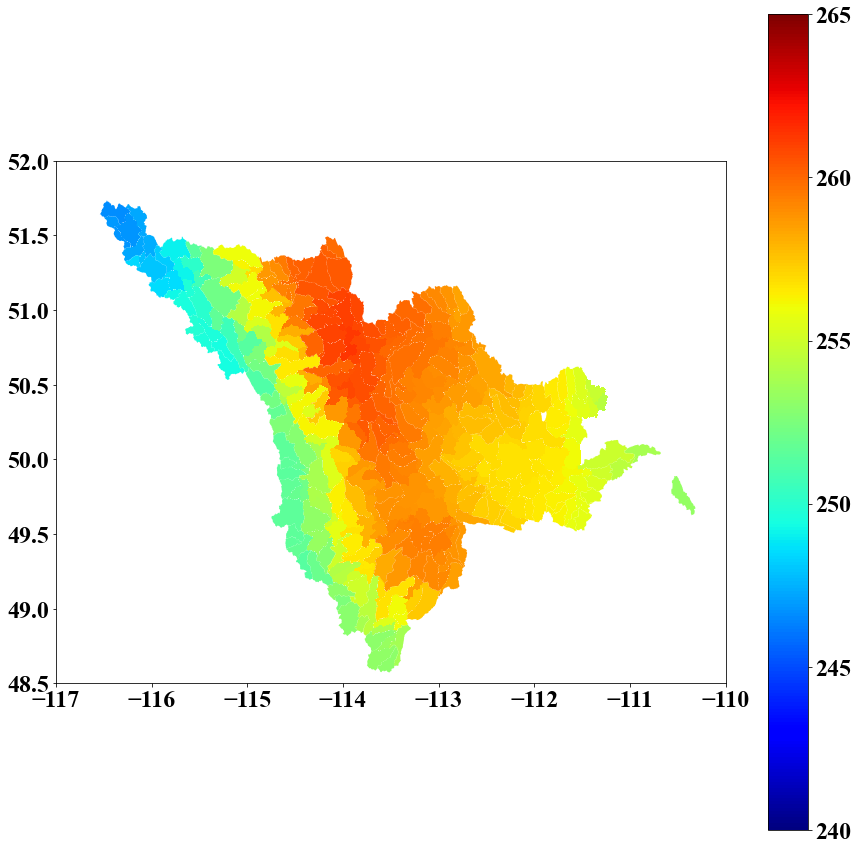

In [107]:
visualziation ('../output/ERA5_Medicine_Hat_remapped_1979-01-*.nc',
               'temperature',
               '1979-01-03 01:00:00',
               name_of_shp = '../temporary/ERA5_Medicine_Hat_target_shapefile.shp',
               shp_ID_field = 'ID',
               nc_ID_variable = 'ID',
               cmap = 'jet',
               x_lim_value = (-117,-110),
               y_lim_value = (48.5,52.0),
               v_min_max= (240,265) ) # 'viridis'




../data/Source_nc_WRF/WRF_merged_2000-10-01.nc
<xarray.Dataset>
Dimensions:      (y: 168, x: 199)
Coordinates:
    time         datetime64[ns] 2000-10-01T03:00:00
    XLONG        (y, x) float64 ...
    XLAT         (y, x) float64 ...
Dimensions without coordinates: y, x
Data variables:
    I_RAINNC     (y, x) float64 ...
    LWDNB        (y, x) float32 ...
    P            (y, x) float32 ...
    PREC_ACC_C   (y, x) float32 ...
    PREC_ACC_NC  (y, x) float32 ...
    Q2           (y, x) float32 ...
    RAINC        (y, x) float32 ...
    RAINNC       (y, x) float32 ...
    SWDNB        (y, x) float32 ...
    T2           (y, x) float32 ...
    U10          (y, x) float32 ...
    V10          (y, x) float32 ...
261.57422
EASYMORE detect that only netcdf file is provided for visualziation assume that is gridded


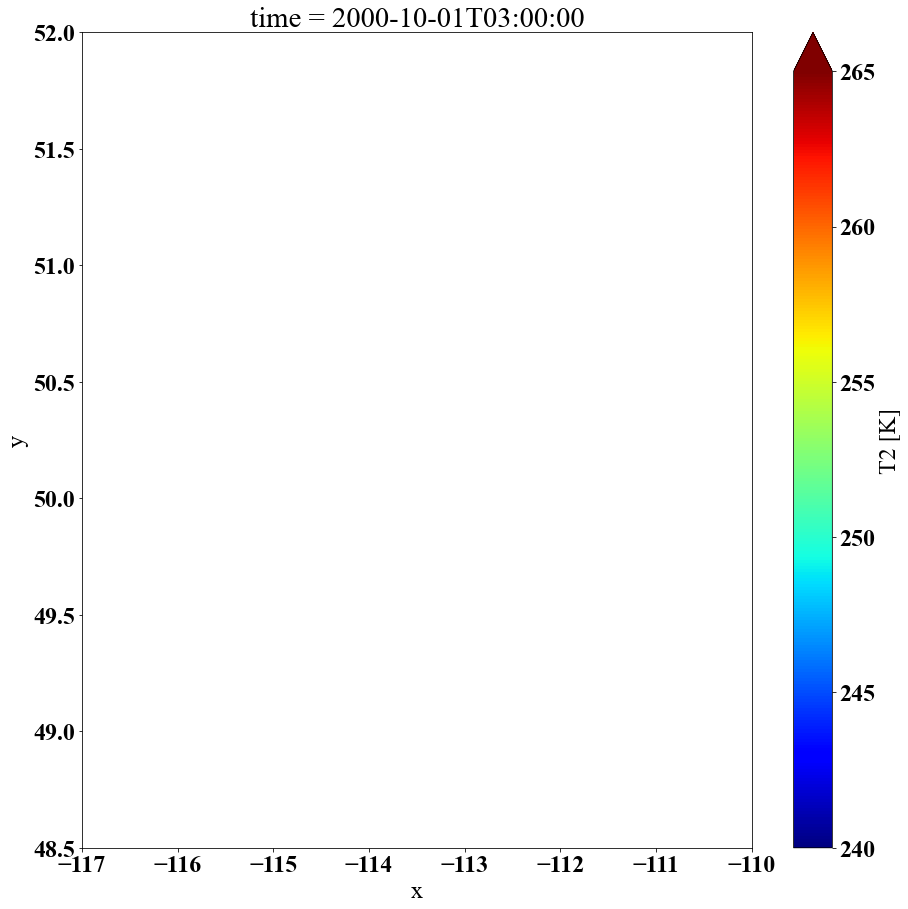

In [109]:
visualziation ('../data/Source_nc_WRF/WRF_merged_2000-10-01.nc',
               'T2',
               '2000-10-01 03:00:00',
               name_of_shp = None,
               cmap = 'jet',
              x_lim_value = (-117,-110),
               y_lim_value = (48.5,52.0), #) # 'viridis' ,
              v_min_max= (240,265) )

In [118]:
ds = xr.open_dataset('../data/Source_nc_WRF/WRF_merged_2000-10-01.nc')
ds_slice = ds.sel(time='1979-01-03 01:00:00', method='nearest')
print(ds_slice)
ds_slice = ds_slice.set_index('XLONG')
print(ds_slice)
ds_slice['T2'].plot()



<xarray.Dataset>
Dimensions:      (y: 168, x: 199)
Coordinates:
    time         datetime64[ns] 2000-10-01
    XLONG        (y, x) float64 ...
    XLAT         (y, x) float64 ...
Dimensions without coordinates: y, x
Data variables:
    I_RAINNC     (y, x) float64 ...
    LWDNB        (y, x) float32 ...
    P            (y, x) float32 ...
    PREC_ACC_C   (y, x) float32 ...
    PREC_ACC_NC  (y, x) float32 ...
    Q2           (y, x) float32 ...
    RAINC        (y, x) float32 ...
    RAINNC       (y, x) float32 ...
    SWDNB        (y, x) float32 ...
    T2           (y, x) float32 ...
    U10          (y, x) float32 ...
    V10          (y, x) float32 ...


ValueError: the first argument to .set_index must be a dictionary

In [1]:
# loading EASYMORE
from easymore.easymore import easymore

# initializing EASYMORE object
esmr = easymore()

# specifying EASYMORE objects
# name of the case; the temporary, remapping and remapped file names include case name
esmr.case_name                = 'ERA5_Medicine_Hat'              
# temporary path that the EASYMORE generated GIS files and remapped file will be saved
esmr.temp_dir                 = '../temporary/'
# name of target shapefile that the source netcdf files should be remapped to
esmr.target_shp               = '../data/target_shapefiles/South_Saskatchewan_MedicineHat.shp'
# name of netCDF file(s); multiple files can be specified with *
esmr.source_nc                = '../data/Source_nc_ERA5/ERA5_NA_*.nc'
# name of variables from source netCDF file(s) to be remapped
esmr.var_names                = ['airtemp','pptrate']
# rename the variables from source netCDF file(s) in the remapped files;
# it will be the same as source if not provided
esmr.var_names_remapped       = ['temperature','precipitation']
# name of variable longitude in source netCDF files
esmr.var_lon                  = 'longitude'
# name of variable latitude in source netCDF files
esmr.var_lat                  = 'latitude'
# name of variable time in source netCDF file; should be always time
esmr.var_time                 = 'time'
# location where the remapped netCDF file will be saved
esmr.output_dir               = '../output/'
# format of the variables to be saved in remapped files,
# if one format provided it will be expanded to other variables
esmr.format_list              = ['f4']
# fill values of the variables to be saved in remapped files,
# if one value provided it will be expanded to other variables
esmr.fill_value_list          = ['-9999.00']
# if required that the remapped values to be saved as csv as well
esmr.save_csv                 = True
esmr.complevel                 =  9




EASYMORE version 0.0.3 is initiated.


In [12]:
esmr.NetCDF_SHP_lat_lon()

if hasattr(esmr, 'lat_expanded') and hasattr(esmr, 'lon_expanded'):
    esmr.lat_lon_SHP(esmr.lat_expanded, esmr.lon_expanded,\
        esmr.temp_dir+esmr.case_name+'_source_shapefile1.shp')
else:
    esmr.lat_lon_SHP(esmr.lat, self.lon,\
        esmr.temp_dir+esmr.case_name+'_source_shapefile1.shp')
    


EASYMORE detects case 1 - regular lat/lon
max difference of lat values in source nc files are :  0.0
max difference of lon values in source nc files are :  0.0


In [7]:
esmr.lat_lon_SHP(esmr.lat,
                    esmr.lon,
                    'test.shp')

In [6]:
print(esmr.lat_expanded)

[[75.   75.   75.   ... 75.   75.   75.  ]
 [74.75 74.75 74.75 ... 74.75 74.75 74.75]
 [74.5  74.5  74.5  ... 74.5  74.5  74.5 ]
 ...
 [ 5.5   5.5   5.5  ...  5.5   5.5   5.5 ]
 [ 5.25  5.25  5.25 ...  5.25  5.25  5.25]
 [ 5.    5.    5.   ...  5.    5.    5.  ]]


In [8]:
import geopandas as gpd

In [13]:
shp = gpd.read_file(esmr.temp_dir+esmr.case_name+'_source_shapefile1.shp')



<AxesSubplot:>

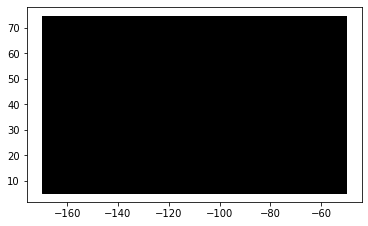

In [10]:
shp.geometry.boundary.plot(color=None,edgecolor='k',linewidth = 1)